In [1]:
train_df<-read.csv("../Data/Titanic_train.csv")
head(train_df)
tail(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [2]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### 컬럼 내용 확인
- Survived : 생존여부,0=사망, 1=생존 (target 컬럼)
- Pclass : 티켓등급, 1 = 1등급, 2 = 2등급, 3 = 3등급
- Sibsp: 함께 탑승한 형제, 자매, 배우자의 수
- PArch: 함께 탑승한 부모, 자식의 수
- Fare: 운임
- Cabin: 객실 번호
- Embarked: 탑승 항구, C=Chermsbourg, Q=Queenstown, S=Southampton

In [3]:
# 각 컬럼별 NA 확인
sum(is.na(train_df))
colSums(is.na(train_df)) #colum별 sum

[1] 177

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [4]:
177/891

[1] 0.1986532

In [5]:
# train_df$Age가 NA인 것 빼고 데이터셋 만들기
head(subset(train_df, !is.na(train_df$Age)))
nrow(subset(train_df, !is.na(train_df$Age)))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


[1] 714

In [6]:
# Survived 기준으로 Dataset 정렬
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [7]:
train_df<-arrange(train_df, Survived)
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


In [8]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [9]:
dim(train_df)

[1] 891  12

In [10]:
# Target ColumnL Survived 분석 및 확인

In [11]:
table(train_df$Survived)
# table(train_df$Survived)[2]


  0   1 
549 342 

In [34]:
#Survived의 생존과 사망 Count 확인 및 비율 계산하기
liveCount<-sum(train_df$Survived==1)
deathCount<-sum(train_df$Survived==0)
round(sum(train_df$Survived==1)/(sum(train_df$Survived==1)+sum(train_df$Survived==0))*100,2)

[1] 38.38

In [35]:
#사망자수
nrow(subset(train_df, Survived==0))
#생존자수
nrow(subset(train_df, Survived==1))
#비율
nrow(subset(train_df, Survived==1)) / nrow(train_df) 

[1] 549

[1] 342

[1] 0.3838384

In [36]:
library(plotrix)

In [39]:
survivedVector<-c(deathCount,liveCount)
ratio <-round(t/sum(t)*100,2)
label <- paste(c("사망","생존"),"\n",ratio,"%")

options(warn=-1)
par(family="AppleGothic")
pie3D(survivedVector,
     main="타이타닉호 생존율",
      labels=label,
      explode=0.05
    )

ERROR: Error in sum(t): 인자의 'type' (closure)이 올바르지 않습니다


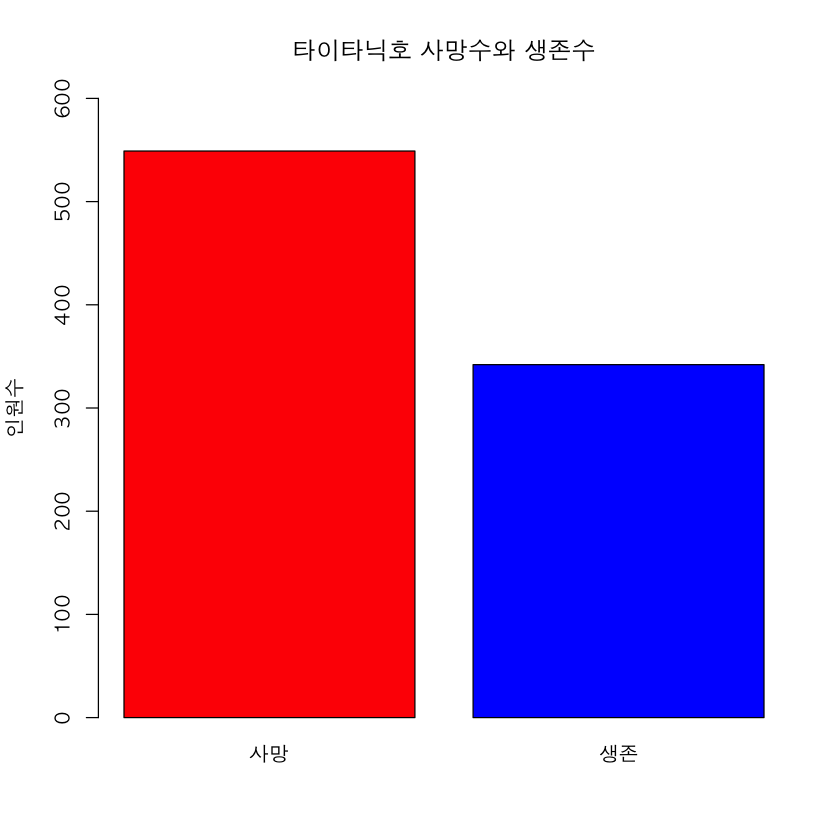

In [33]:

par(family="AppleGothic")
barplot(survivedVector,
       ylim=c(0,600),
       names=c("사망","생존"),
        main="타이타닉호 사망수와 생존수",
       ylab="인원수",
       col=c("red","blue"))


In [17]:
par(family="AppleGothic")
barplot(table(train_df$Survived),
         ylim=c(0,600),
       names=c("사망","생존"),
        main="타이타닉호 사망수와 생존수",
       ylab="인원수",
       col=c("red","blue")
        )

> Target Column으로 Survived를 선정

---
# Feature column 찾기

In [18]:
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


### Sex Column 확인

In [19]:
# Sex 컬럼 분류 확인
unique(train_df$Sex)

[1] male   female
Levels: female male

In [20]:
# 여성과 남성의 인원 확인
femaleCount <- sum(train_df$Sex=="female")
maleCount <- sum(train_df$Sex=="male")

In [21]:
femaleCount
maleCount

[1] 314

[1] 577

In [22]:
# 여성의 생존수와 사망수 
nrow(subset(subset(train_df, Sex=="female"), subset(train_df, Sex=="female")$Survived==1))
nrow(subset(subset(train_df, Sex=="female"), subset(train_df, Sex=="female")$Survived==0))

femaleSurvived<-nrow(subset(train_df, (Sex=="female")&(Survived==1)));femaleSurvived
femaleDeath<-nrow(subset(train_df, (Sex=="female")&(Survived==0)));femaleDeath

[1] 233

[1] 81

[1] 233

[1] 81

In [23]:
# 남성의 생존수와 사망수
nrow(subset(subset(train_df, Sex=="male"), subset(train_df, Sex=="male")$Survived==1))
nrow(subset(subset(train_df, Sex=="male"), subset(train_df, Sex=="male")$Survived==0))
maleSurvived<-nrow(subset(train_df, (Sex=="male")&(Survived==1)));maleSurvived
maleDeath<-nrow(subset(train_df, (Sex=="male")&(Survived==0)));maleDeath

[1] 109

[1] 468

[1] 109

[1] 468

In [24]:
233/(233+81)

[1] 0.7420382

In [25]:
109/(109+468)

[1] 0.1889081

In [26]:
# 여성의 생존율과 사망율
cat("여성의 생존율:",round(femaleSurvived/(femaleSurvived + femaleDeath)*100,2),"%","\n")
  cat("여성의 사망율:",round(femaleDeath/(femaleSurvived + femaleDeath)*100,2),"%","\n")
    
    
    

여성의 생존율: 74.2 % 
여성의 사망율: 25.8 % 


In [27]:
cat("남성의 생존율:",round(maleSurvived/(maleSurvived + maleDeath)*100,2),"%","\n")
cat("남성의 사망율:",round(maleDeath/(maleSurvived + maleDeath)*100,2),"%","\n")
    
    

남성의 생존율: 18.89 % 
남성의 사망율: 81.11 % 


> Sex 컬럼은 Feature로 적합

> [Survived]<-[Sex]

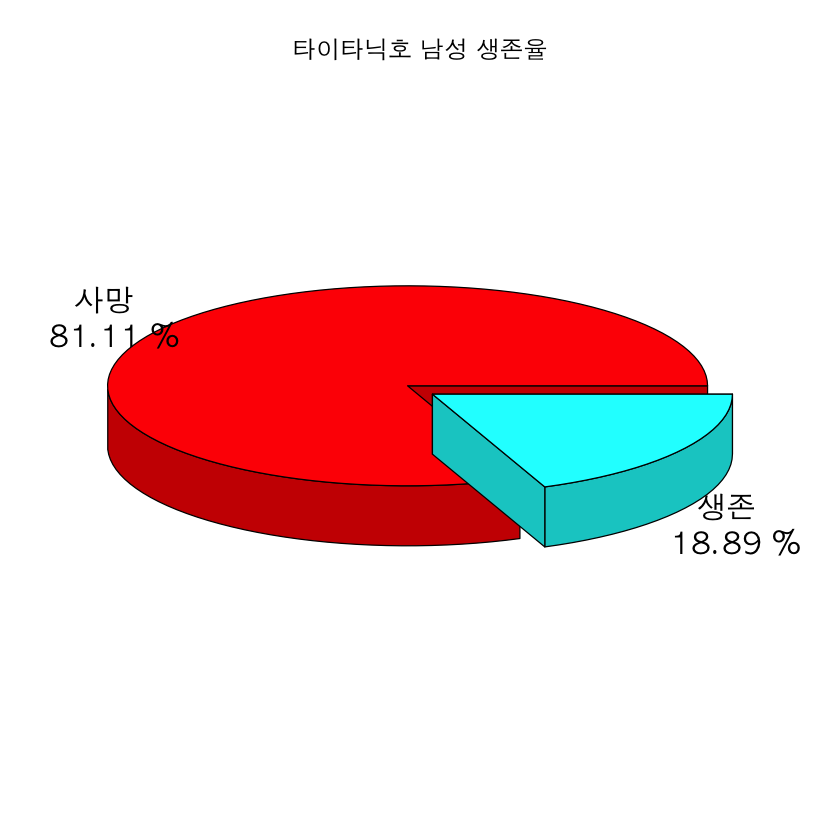

In [28]:
liveVector_m<-c(maleDeath, maleSurvived)
ratio<-round(liveVector_m/sum(liveVector_m)*100,2)
label <- paste(c("사망","생존"),"\n",ratio,"%")

options(warn=-1)
par(family="AppleGothic")
pie3D(liveVector_m,
     main="타이타닉호 남성 생존율",
      labels=label,
      explode=0.05
    )

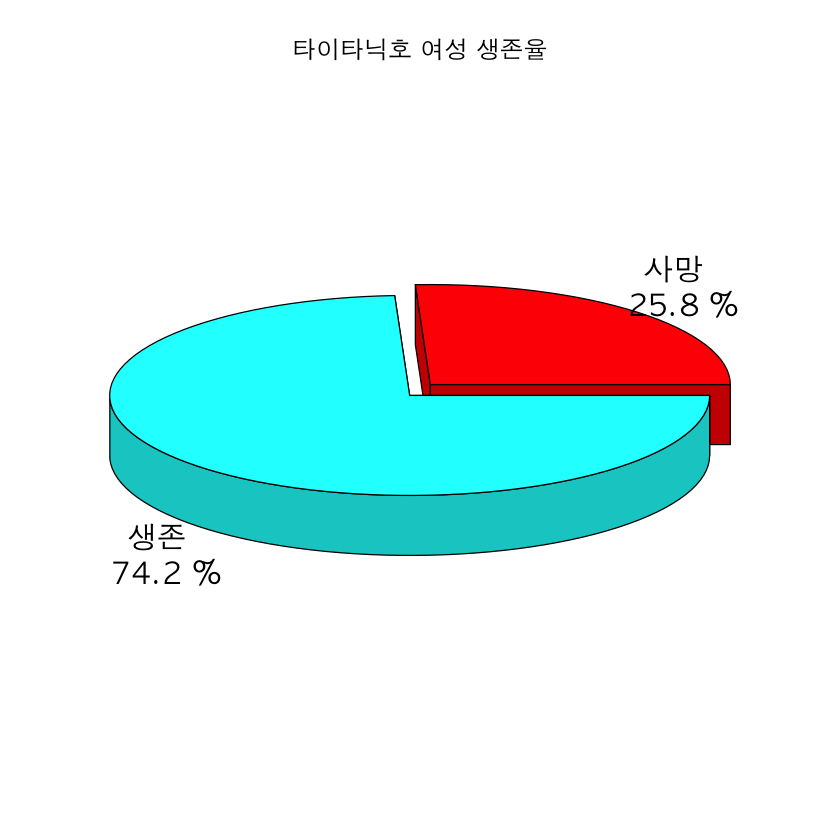

In [29]:
liveVector_f<-c(femaleDeath, femaleSurvived)
ratio<-round(liveVector_f/sum(liveVector_f)*100,2)
label <- paste(c("사망","생존"),"\n",ratio,"%")

options(warn=-1)
par(family="AppleGothic")
pie3D(liveVector_f,
     main="타이타닉호 여성 생존율",
      labels=label,
      explode=0.05
    )

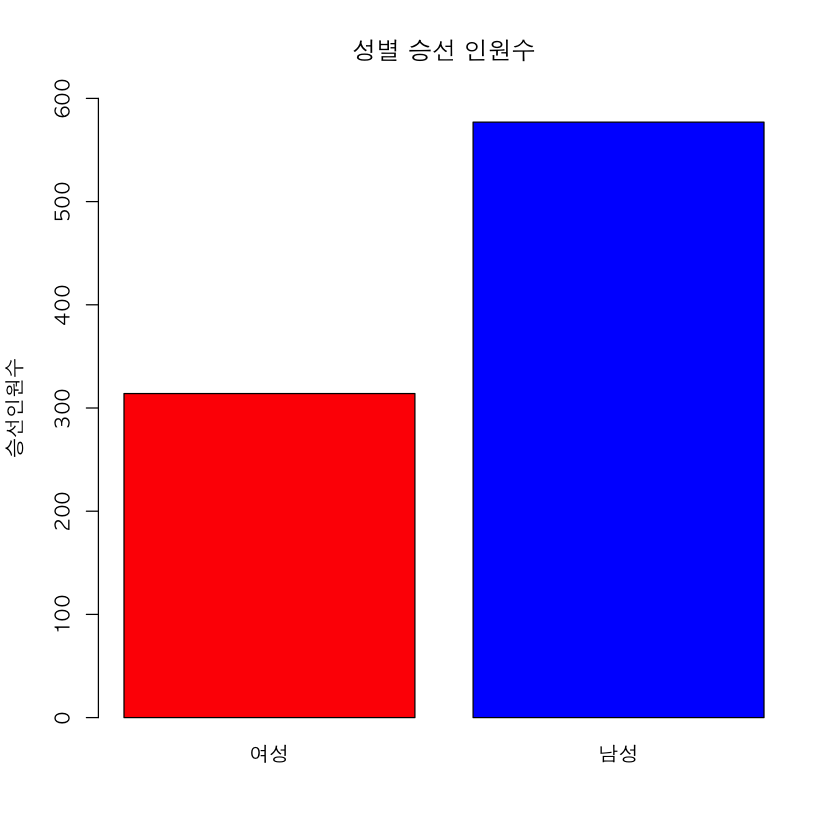

In [30]:
# 막대그래프

par(family="AppleGothic")
barplot(table(train_df$Sex),
        ylim=c(0,600),
        names=c("여성","남성"),
        main="성별 승선 인원수",
        ylab="승선인원수",
        col=c("red","blue")
        )


In [31]:
options(warn=-1)
par(mfrow =c(3,2))
par(family="AppleGothic")
pie3D(survivedVector,
     main="타이타닉호 생존율",
      labels=label,
      explode=0.05,
      labelcex = 0.5
    )
barplot(survivedVector,
       ylim=c(0,600),
       names=c("사망","생존"),
        main="타이타닉호 사망수와 생존수",
       ylab="인원수",
       col=c("red","blue"),
       
      )
text(0.7,deathCount+30,deathCount)
text(1.9,liveCount+30,liveCount)
par(family="AppldeathCount,liveCounteGothic")
pie3D(liveVector_m,
     main="타이타닉호 남성 생존율",
      labels=label,
      explode=0.05,
      labelcex = 0.5
    )
par(family="AppleGothic")
pie3D(liveVector_f,
     main="타이타닉호 여성 생존율",
      labels=label,
      explode=0.05,
      labelcex = 0.5
    )

barplot(table(train_df$Sex),
        ylim=c(0,600),
        names=c("여성","남성"),
        main="성별 승선 인원수",
        ylab="승선인원수",
        col=c("red","blue")
        )
#text(0.7,deathCount+30,deathCount)
#text(1.9,liveCount+30,liveCount)

ERROR: Error in pie3D(survivedVector, main = "타이타닉호 생존율", labels = label, : 객체 'survivedVector'를 찾을 수 없습니다


---
### 티켓 등급 분석

In [ ]:
table(train_df$Pclass) #surived와 연관시켜서 봐야함

In [ ]:
str(train_df)

In [ ]:
# 1등 객실의 여성 생존율
f1_survived<-nrow(subset(train_df,(train_df$Pclass==i)&(train_df$Sex=="j")&(train_df$Survived==1)))


In [ ]:
f1_death<-nrow(subset(train_df,(train_df$Pclass==i)&(train_df$Sex=="female")&(train_df$Survived==0)))

In [ ]:
cat("1등 객실의 여성 생존율은",f1_survived,"/",f1_survived+f1_death,"," ,round(f1_survived/(f1_survived+f1_death)*100,2),"%")


In [ ]:
for(j in c("female", "male")){
for(i in 1:3){
    
    f1_survived<-nrow(subset(train_df,(train_df$Pclass==i)&(train_df$Sex==j)&(train_df$Survived==1)))
    f1_death<-nrow(subset(train_df,(train_df$Pclass==i)&(train_df$Sex==j)&(train_df$Survived==0)))
     cat(i,"등 객실의",ifelse(j=="female", "여성", "남성"), "생존율은",
         f1_survived,"/",f1_survived+f1_death,"," ,round(f1_survived/(f1_survived+f1_death)*100,2),"%","\n")
    
    }
    cat("-------------------------------------\n")
    }

In [ ]:
class_survived<-c()
for(j in c("female", "male")){
    for(i in 1:3){
    
        f1_survived<-nrow(subset(train_df,(train_df$Pclass==i)&(train_df$Sex==j)&(train_df$Survived==1)))
        f1_death<-nrow(subset(train_df,(train_df$Pclass==i)&(train_df$Sex==j)&(train_df$Survived==0)))
         cat(i,"등 객실의",ifelse(j=="female", "여성", "남성"), "생존율은",
             f1_survived,"/",f1_survived+f1_death,"," ,round(f1_survived/(f1_survived+f1_death)*100,2),"%","\n")
        class_survived<-append(class_survived, round(f1_survived/(f1_survived+f1_death)*100,2))
        }
        cat("-------------------------------------\n")
}
class_survived

In [ ]:

par(family="AppleGothic")
barplot(class_survived,
        xlab="객실등급",
        ylab="생존율",
        ylim=c(0,100),
        main="객실 등급별 생존율",
        density=c(rep(10,3),rep(100,3)),
        border=c(rep("red",3),rep("blue",3)),
        names=c("1(여)","","3(여)","","2(남)","")
        
       )

for(i in 1:6){
   
    text(0.7 + 1.2*(i-1), class_survived[i]-5, class_survived[i])
}

---
### Embarked(항구의 위치)

In [ ]:
str(train_df)

In [ ]:
table(train_df$Embarked) 
unique(train_df$Embarked) 

In [ ]:
# 빈 칸의 데이터 찾기
subset(train_df, Embarked=="")

In [ ]:
# 제일 많은 운임을 지불한 사람

subset(train_df, Fare == max(train_df$Fare))

In [ ]:
mean(train_df$Fare)

In [ ]:
# 항구별 탑승인원을 구하여 가장 많은 탑승인원의 항구로 결정
# S항구 탑승인원
sum(train_df$Embarked=="S")
# C항구 탑승인원
sum(train_df$Embarked=="C")
# Q항구 탑승인원
sum(train_df$Embarked=="Q")

> 빈 값 항구를 S항구로 변경

In [ ]:
# 연습을 위한 데이터셋 복제
train_df_T <-train_df

In [ ]:
# 빈 칸 항구 찾기-1
subset(train_df_T, Embarked=="")

In [ ]:
# 빈 칸 항구 찾기-2 T/F
train_df_T[train_df_T$Embarked=="",]

In [ ]:
# 빈 칸 항구를 S항구로 변경 - 1
train_df_T$Embarked <- ifelse(train_df_T$Embarked == "", 'S', train_df_T$Embarked)

In [ ]:
train_df_T[train_df_T$Embarked=="",]

In [ ]:
# 빈 칸 항구를 S항구로 변경 - 2
train_df_T<-train_df

In [ ]:
train_df_T[train_df_T$Embarked=="",]

In [ ]:
train_df_T[train_df_T$Embarked == "",]$Embarked <-"S"

In [ ]:
train_df_T[train_df_T$Embarked=="",]

In [ ]:
# 빈 칸 항구를 S항구로 변경 - 3
train_df_T<-train_df

In [ ]:
train_df_T$Embarked[train_df_T$Embarked == ""]<-"S"

In [ ]:
train_df$Embarked[train_df$Embarked == ""]<-"S"

In [ ]:
sum(train_df$Embarked=="S")

In [ ]:
str(train_df)

In [ ]:
train_df$Embarked <-factor(train_df$Embarked)
str(train_df)

In [ ]:
# 항구별 승선 인원

table(train_df$Embarked)

In [ ]:
par(family="AppleGothic")
barplot(table(train_df$Embarked),
       col=c("blue","red",'yellow'),
        main="항구별 승선 인원",
        xlab="항구별",
        ylab="인원수",
        ylim=c(0,700)
       )

In [ ]:
# 항구별 성별 승선 인원
table(train_df$Embarked, train_df$Sex)

In [ ]:
par(family="AppleGothic")
barplot(t(table(train_df$Embarked, train_df$Sex)),
       beside=T,
       col=c("red","blue"),
         main="항구별/성별 승선 인원",
        xlab="항구별/성별",
        ylab="인원수",
        ylim=c(0,500),
       
        )
legend(2,450,
      c("female","male"),
#       cex =0.7,
      fill = c("red","blue")
      )

In [ ]:
# 항구별 생존 인원
table(train_df$Embarked, train_df$Survived)

In [ ]:
par(family="AppleGothic")
barplot(t(table(train_df$Embarked, train_df$Survived)),
          beside=T,
                 col=c("red","blue"),
         main="항구별 생존 인원",
        xlab="항구별/생존여부",
        ylab="인원수",
        ylim=c(0,500),
       
        )
legend(2,450,
      c("death","survive"),
#       cex =0.7,
      fill = c("red","blue")
      )
        

In [ ]:
# 항구별 객실 등급별 인원

par(family="AppleGothic")
barplot(t(table(train_df$Embarked, train_df$Pclass)),
          beside=T,
                 col=c("red","blue","yellow"),
         main="항구별/객실 등급별 인원",
        xlab="항구별/객실 등급",
        ylab="인원수",
        ylim=c(0,500),
       
        )
legend(2,450,
      c("1","2","3"),
#       cex =0.7,
      fill = c("red","blue",'yellow')
      )

In [ ]:
options(warn=-1)
par(mfrow =c(2,2))
par(family="AppleGothic")

barplot(table(train_df$Embarked),
       col=c("blue","red",'yellow'),
        main="항구별 승선 인원",
        xlab="항구별",
        ylab="인원수",
        ylim=c(0,700)
       )

barplot(t(table(train_df$Embarked, train_df$Sex)),
       beside=T,
       col=c("red","blue"),
         main="항구별/성별 승선 인원",
        xlab="항구별/성별",
        ylab="인원수",
        ylim=c(0,500),
       
        )
legend(2,450,
      c("female","male"),
#       cex =0.7,
      fill = c("red","blue")
      )


barplot(t(table(train_df$Embarked, train_df$Survived)),
          beside=T,
                 col=c("red","blue"),
         main="항구별 생존 인원",
        xlab="항구별/생존여부",
        ylab="인원수",
        ylim=c(0,500),
       
        )
legend(2,450,
      c("death","survive"),
#       cex =0.7,
      fill = c("red","blue")
      )





barplot(t(table(train_df$Embarked, train_df$Pclass)),
          beside=T,
                 col=c("red","blue","yellow"),
         main="항구별/객실 등급별 인원",
        xlab="항구별/객실 등급",
        ylab="인원수",
        ylim=c(0,500),
       
        )
legend(2,450,
      c("1","2","3"),
#       cex =0.7,
      fill = c("red","blue",'yellow')
      )



---
# RandomForest로 예측모델 생성

In [ ]:
train_df_T <-train_df

target_col <- c("Survived","Sex","Pclass","Embarked")
head(train_df_T[,target_col])

train_df_T$SexCode[train_df_T$Sex=="male"] <-0
train_df_T$SexCode[train_df_T$Sex=="female"] <-1

subset(train_df_T, select= -Sex)
head(train_df_T)

target_col <-c("Survived","Sex","Pclass","Embarked")
head(train_df_T[target_col])

train_df_T$Embarked_C = train_df_T$Embarked =="C"
train_df_T$Embarked_S = train_df_T$Embarked =="S"
train_df_T$Embarked_Q = train_df_T$Embarked =="Q"

head(train_df_T[c("Embarked",'Embarked_C','Embarked_S','Embarked_Q')])

target_col = c("Survived", "Pclass","SexCode",'Embarked_C','Embarked_S','Embarked_Q')
head(train_df_T[,target_col])

In [ ]:
# 복사본
train_df_T <-train_df

In [ ]:
# 예측을 위한 컬럼 확인
target_col <- c("Survived","Sex","Pclass","Embarked")
head(train_df_T[,target_col])

head(train_df_T)
tail(train_df_T)

In [ ]:
# Sex 컬럼을 숫자로 전환
train_df_T$SexCode[train_df_T$Sex=="male"] <-0
train_df_T$SexCode[train_df_T$Sex=="female"] <-1

In [ ]:
head(train_df_T)
tail(train_df_T)

In [ ]:
# Sex컬럼 삭제
subset(train_df_T, select= -Sex)
head(train_df_T)

In [ ]:
target_col <-c("Survived","Sex","Pclass","Embarked")
head(train_df_T[target_col])

#Embarked를 숫자로 전환
C=0, S=1, Q=2 -> 맞긴 맞지만 좋은 생각이 아님.
2 * S = Q ?
S + S = Q ?

### One-Hot Encoding 방법
C == [1,0,0]
S == [0,1,0]
P == [0,0,1]
처럼 행렬로 만들면 덧셈과 뺄셈 등 각각의 계산에 안전해짐.
R은 내부적으로 1은 True, 0은 False.

In [ ]:
#T/F
train_df_T$Embarked_C = train_df_T$Embarked =="C"
train_df_T$Embarked_S = train_df_T$Embarked =="S"
train_df_T$Embarked_Q = train_df_T$Embarked =="Q"

head(train_df_T[c("Embarked",'Embarked_C','Embarked_S','Embarked_Q')])

In [ ]:
target_col = c("Survived", "Pclass","SexCode",'Embarked_C','Embarked_S','Embarked_Q')
head(train_df_T[,target_col])

In [ ]:
train_df_P<-train_df

In [ ]:
target_col_2 = c("Survived", "Pclass","SexCode",'Embarked_C','Embarked_S','Embarked_Q','Age')
head(train_df_P[,target_col])
train_data_P <- train_df_P[,target_col]

In [ ]:
train_data <- train_df_T[,target_col]

In [ ]:
head(train_data )

In [ ]:
str(train_data )

In [ ]:
str(target_col)

In [ ]:
# Sampling
set.seed(1234)
library(caret)
samp<-createDataPartition(train_data$Survived, p=0.7, list=F) #0.7~0.8 데이터가 매우 많으면 5:5 도 괜찮.


In [ ]:
# 학습용
data.train<-train_data[samp,]

In [ ]:
# 검증용
data.test<-train_data[-samp,]

In [ ]:
library(randomForest)

In [ ]:
model.rf<-randomForest(Survived~., data=data.train, ntree=100) # ctree 몇개?, 기본=100

In [ ]:
x <- subset(data.test, select=-Survived)
y <- data.test$Survived

In [ ]:
# 주관식
pred <- predict(model.rf, x)
head(pred)

In [ ]:
mean(pred==y)

In [ ]:
pred[pred <=0.5] <-0
pred[pred > 0.5] <-1
head(pred)

In [ ]:
mean(pred==y)
table(pred,y)

---
# Survived를 factor로 변환 후에 randomForeset 실행

In [ ]:
data.train$Survived <-as.factor(data.train$Survived)
data.test$Survived <-as.factor(data.test$Survived)

In [ ]:
rf <- randomForest(Survived~., data=data.train, ntree=100)

In [ ]:
x<-subset(data.test, select = -Survived)
y<- data.test$Survived

In [ ]:
pred <- predict(rf, x)
head(pred)

In [ ]:
pred <- predict(rf, x)


In [ ]:
table(pred,y)

In [ ]:
library(nnet)

In [ ]:
#다항로지스틱회귀분석
model <- multinom(Survived~., data=data.train)

In [ ]:
x<-subset(data.test, select = -Survived)
y<- data.test$Survived

In [ ]:
pred <- predict(model, x)
head(pred)

In [ ]:
mean(pred==y)
table(pred,y)

In [ ]:
#SVM
library(e1071)
model.svm = svm(Survived~., data=data.train)

In [ ]:
x<-subset(data.test, select = -Survived)
y<- data.test$Survived

In [ ]:
pred <- predict(model.svm, x)
mean(pred==y)
table(pred,y)

In [ ]:
# 인공신경망
model.nnet<-nnet(Survived~., data=data.train, size=3)

In [ ]:
pred<- predict(model.nnet, x, type="class") 
head(pred)


In [ ]:
mean(pred==y)
table(pred,y)

In [ ]:
# 의사결정나무
library(party)

In [ ]:
model.ctree <-ctree(Survived~., data=data.train)

In [ ]:
x<-subset(data.test, select = -Survived)
y<- data.test$Survived

In [ ]:
pred <- predict(model.svm, x)
head(pred)

In [ ]:
mean(pred==y)
table(pred,y)

In [ ]:
head(train_df)

In [ ]:
train_df$AgeCode<-train_df$Age%/%10
head(train_df)

In [ ]:
subset(train_df, 

In [ ]:
arrange(train_df, desc(Age))

In [ ]:
train_df$AgeCode<-train_df$Age%/%10
head(train_df)

In [ ]:
subset(train_df, !is.na(train_df$AgeCode))

In [ ]:
table(train_df$AgeCode,train_df$Survived)
barplot(t(table(train_df$AgeCode,train_df$Survived)),
        beside=T,
        col=c("red","blue")
       )

legend(2,120,
      c("death","survive"),
#       cex =0.7,
      fill = c("red","blue")
      )

In [ ]:
table(train_df$AgeCode,train_df$Pclass)
barplot(t(table(train_df$AgeCode,train_df$Pclass)),
        beside=T,
         col=c("red","blue","yellow"),
        ylim=c(0,160)
       )

legend(2,120,
      c("1","2","3"),
#       cex =0.7,
      fill = c("red","blue","yellow")
      )

In [ ]:
barplot(t(table(train_df$AgeCode,train_df$Embarked)),
        beside=T,
          col=c("red","blue","yellow"),
        ylim=c(0,200)
       )

legend(2,150,
      c("C","Q","S"),
#       cex =0.7,
      fill = c("red","blue","yellow")
      )



In [ ]:
par(family="AppleGothic")
par(mfrow=c(2,2))
barplot(t(table(train_df$AgeCode,train_df$Survived)),
        beside=T,
        col=c("red","blue"),
        main="나이대별 사망/생존자수"
       )

legend(12,120,
      c("death","survive"),
#       cex =0.7,
      fill = c("red","blue")
      )
barplot(t(table(train_df$AgeCode,train_df$Embarked)),
        beside=T,
          col=c("red","blue","yellow"),
        ylim=c(0,200),
        main="나이대별 항구"
       )

legend(2,150,
      c("C","Q","S"),
#       cex =0.7,
      fill = c("red","blue","yellow")
      )
barplot(t(table(train_df$AgeCode,train_df$Pclass)),
        beside=T,
         col=c("red","blue","yellow"),
        ylim=c(0,160),
        main="나이대별 객실등급"
       )

legend(2,130,
      c("1","2","3"),
#       cex =0.7,
      fill = c("red","blue","yellow")
      )
barplot(t(table(train_df$AgeCode,train_df$Sex)),
        beside=T,
       col=c("red","blue"),
        ylim=c(0,160),
        main="나이대별 성별"
       )

legend(15,120,
      c("female","male"),
#       cex =0.7,
      fill = c("red","blue")
      )

In [ ]:
table(train_df$AgeCode,train_df$Sex)
barplot(t(table(train_df$AgeCode,train_df$Sex)),
        beside=T,
       col=c("red","blue"),
        ylim=c(0,160)
       )

legend(2,120,
      c("female","male"),
#       cex =0.7,
      fill = c("red","blue")
      )

In [ ]:
train_df$AgeCode1 <- ifelse(train_df$Age<=5, 0, 1)
table(train_df$AgeCode1)


In [ ]:
train_df<-subset(train_df, !is.na(train_df$AgeCode1))

In [ ]:
par(family="AppleGothic")
par(mfrow=c(2,2))
barplot(t(table(train_df$AgeCode1,train_df$Survived)),
        beside=T,
        col=c("red","blue"),
         ylim=c(0,450),
        main="나이대별 사망/생존자수"
       )

legend(1,450,
      c("death","survive"),
#       cex =0.7,
      fill = c("red","blue")
       
      )
barplot(t(table(train_df$AgeCode1,train_df$Embarked)),
        beside=T,
          col=c("red","blue","yellow"),
        ylim=c(0,500),
        main="나이대별 항구"
       )

legend(2,400,
      c("C","Q","S"),
#       cex =0.7,
      fill = c("red","blue","yellow")
      )
barplot(t(table(train_df$AgeCode1,train_df$Pclass)),
        beside=T,
         col=c("red","blue","yellow"),
        ylim=c(0,500),
        main="나이대별 객실등급"
       )

legend(2,450,
      c("1","2","3"),
#       cex =0.7,
      fill = c("red","blue","yellow")
      )
barplot(t(table(train_df$AgeCode1,train_df$Sex)),
        beside=T,
       col=c("red","blue"),
        ylim=c(0,500),
        main="나이대별 성별"
       )

legend(1,450,
      c("female","male"),
#       cex =0.7,
      fill = c("red","blue")
      )

In [ ]:
train_df_P<-train_df

In [ ]:
target_col_2 = c("Survived", "Pclass","SexCode",'Embarked_C','Embarked_S','Embarked_Q','AgeCode1')
head(train_df_P[,target_col])
